<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/yolo_Object_Detection_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLO Object Detection
======================
This Notebook Performs Object Detection using the YOLO V3 pretrained weights and Configuration file. The Idea here is to try and detect an object already present in Imagenet dataset .

In [1]:
import cv2
import numpy as np

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=f035d1db150df09db9ab22e21e9c64d8a73718af5a22f1df539c1dc6f0ec6b30
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Get YoloV3 weights

In [3]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

--2021-08-01 02:46:46--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  36.8MB/s    in 6.8s    

2021-08-01 02:46:53 (34.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



Get the 
1. Network
2. Classes
3. Layers
4. Colors

In [6]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# 
1. Load the image
2. Resize the image
3.find out height, width and channel 

In [31]:
# Loading image
img = cv2.imread("yolov3.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Perform Inferencing of the Object

In [32]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

Display the image along with bounding boxes and class label 

In [33]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [34]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [35]:
from google.colab.patches import cv2_imshow

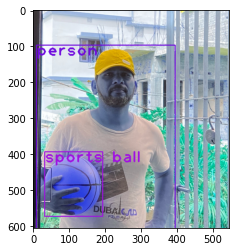

In [36]:
from matplotlib import pyplot as plt
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
plt.imshow(img)
#cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()